# In this part we will discuss the variation of Spearman's Correlation and Kendall's Tau in Partial Robin Round(PRR) and that of Swiss Round(SR)

for PRR:
I want to simulate a partial round-robin tournament system, or read in the team strength, and then after the round-robin opponents are matched, let the games of each team be "evenly" played, that is, each team has one and only one game in each round. Arrange the schedule and shuffle the schedule (that is, the order of each round is shuffled), then play the game, and calculate the change process of the spearman coefficient based on the games of each round.

In [15]:
import pandas as pd
import numpy as np

from scipy.stats import spearmanr, kendalltau
import random
import matplotlib.pyplot as plt

def load_teams_from_txt(filename):
    teams = []
    strengths = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            teams.append(parts[0])
            strengths.append(float(parts[1]))
    return pd.DataFrame({'Team': teams, 'Strength': strengths})

def create_schedule(teams):
    num_teams = len(teams)
    rounds = []
    
    # Generate all possible pairs
    pairs = [(i, j) for i in range(num_teams) for j in range(i + 1, num_teams)]
    random.shuffle(pairs)  # Shuffle pairs to randomize matchups

    # Allocate pairs to rounds
    current_round = []
    used_teams = set()
    while pairs:
        for pair in pairs[:]:
            if pair[0] not in used_teams and pair[1] not in used_teams:
                current_round.append(pair)
                used_teams.add(pair[0])
                used_teams.add(pair[1])
                pairs.remove(pair)
                if len(current_round) == num_teams // 2:
                    rounds.append(current_round)
                    current_round = []
                    used_teams = set()
    return rounds

def calculate_spearman(teams):
    
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    
    return spearman_corr

def calculate_kendall(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    kendall_corr, _ = kendalltau(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return kendall_corr

def simulate_matches(teams, schedule):
    points = {team: 0 for team in teams['Team']}
    spearman_scores = []
    kendalltau=[]
    for round_num, round_matches in enumerate(schedule):
        for team_a_idx, team_b_idx in round_matches:
            team_a = teams.iloc[team_a_idx]
            team_b = teams.iloc[team_b_idx]
            win_prob_a = team_a['Strength'] / (team_a['Strength'] + team_b['Strength'])
            if np.random.rand() < win_prob_a:
                points[team_a['Team']] += 1
            else:
                points[team_b['Team']] += 1

            teams['Points'] = teams['Team'].apply(lambda team: points[team])
            # teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
            # teams_sorted['Initial_Rank'] = teams_sorted.index + 1
            # teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
            # teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
            # spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
            # spearman_scores.append(spearman_corr)
            
            spearman_scores.append(calculate_spearman(teams))
            kendalltau.append(calculate_kendall(teams))

    return spearman_scores, kendalltau
def run_simulation(filename):
    teams = load_teams_from_txt(filename)
    print("1")
    # Create schedule
    schedule = create_schedule(teams)
    print("2")
    # Simulate matches and calculate Spearman coefficients and Kendall's Tau
    spearman_scores, kendall_scores = simulate_matches(teams, schedule)
    print("3")
    # Plotting Spearman coefficients and Kendall's Tau
    plt.figure(figsize=(12, 6))
    plt.plot(spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    plt.plot(kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.grid(True)
    plt.show()

    return spearman_scores, kendall_scores


filename = "teams_0.5.txt"
spearman_scores, _ = run_simulation(filename)


1
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\10725\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\10725\AppData\Local\Temp\ipykernel_11888\810127059.py", line 109, in <module>
    spearman_scores, _ = run_simulation(filename)
  File "C:\Users\10725\AppData\Local\Temp\ipykernel_11888\810127059.py", line 89, in run_simulation
    schedule = create_schedule(teams)
  File "C:\Users\10725\AppData\Local\Temp\ipykernel_11888\810127059.py", line -1, in create_schedule
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\10725\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\10725\AppData\Roaming\Python\Python310\site-packages\IPython\core\ultratb.p

In [ ]:
def generate_round_table_groups(n):
    if n % 2 != 0:
        raise ValueError("n must be even and greater than 2")
    
    isolated_point = 1
    round_table = list(range(2, n + 1))
    groups = []
    
    for _ in range(len(round_table)):
        temp_list = round_table[:]
        group = [(isolated_point, temp_list[0])]
        temp_list.pop(0)
        
        while len(temp_list) > 1:
            group.append((temp_list[0], temp_list[-1]))
            temp_list = temp_list[1:-1]
        
        groups.append(group)
        round_table = round_table[1:] + round_table[:1]
    
    return groups

n = 32
groups = generate_round_table_groups(n)
for i, group in enumerate(groups):
    print(f"Group {i + 1}: {group}")

Group 1: [(1, 2), (3, 32), (4, 31), (5, 30), (6, 29), (7, 28), (8, 27), (9, 26), (10, 25), (11, 24), (12, 23), (13, 22), (14, 21), (15, 20), (16, 19), (17, 18)]
Group 2: [(1, 3), (4, 2), (5, 32), (6, 31), (7, 30), (8, 29), (9, 28), (10, 27), (11, 26), (12, 25), (13, 24), (14, 23), (15, 22), (16, 21), (17, 20), (18, 19)]
Group 3: [(1, 4), (5, 3), (6, 2), (7, 32), (8, 31), (9, 30), (10, 29), (11, 28), (12, 27), (13, 26), (14, 25), (15, 24), (16, 23), (17, 22), (18, 21), (19, 20)]
Group 4: [(1, 5), (6, 4), (7, 3), (8, 2), (9, 32), (10, 31), (11, 30), (12, 29), (13, 28), (14, 27), (15, 26), (16, 25), (17, 24), (18, 23), (19, 22), (20, 21)]
Group 5: [(1, 6), (7, 5), (8, 4), (9, 3), (10, 2), (11, 32), (12, 31), (13, 30), (14, 29), (15, 28), (16, 27), (17, 26), (18, 25), (19, 24), (20, 23), (21, 22)]
Group 6: [(1, 7), (8, 6), (9, 5), (10, 4), (11, 3), (12, 2), (13, 32), (14, 31), (15, 30), (16, 29), (17, 28), (18, 27), (19, 26), (20, 25), (21, 24), (22, 23)]
Group 7: [(1, 8), (9, 7), (10, 6),

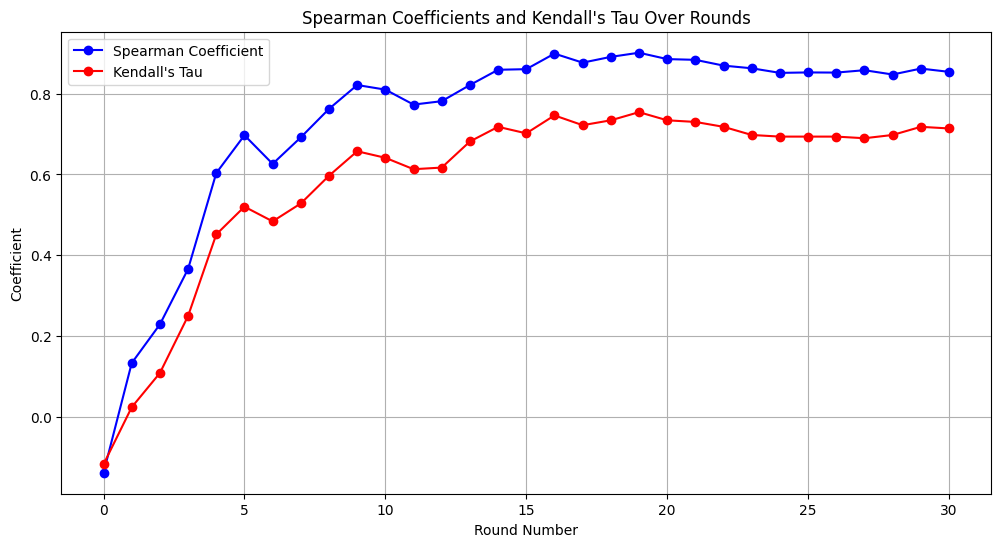

Group 1: [(1, 2), (3, 32), (4, 31), (5, 30), (6, 29), (7, 28), (8, 27), (9, 26), (10, 25), (11, 24), (12, 23), (13, 22), (14, 21), (15, 20), (16, 19), (17, 18)]
Group 2: [(1, 3), (4, 2), (5, 32), (6, 31), (7, 30), (8, 29), (9, 28), (10, 27), (11, 26), (12, 25), (13, 24), (14, 23), (15, 22), (16, 21), (17, 20), (18, 19)]
Group 3: [(1, 4), (5, 3), (6, 2), (7, 32), (8, 31), (9, 30), (10, 29), (11, 28), (12, 27), (13, 26), (14, 25), (15, 24), (16, 23), (17, 22), (18, 21), (19, 20)]
Group 4: [(1, 5), (6, 4), (7, 3), (8, 2), (9, 32), (10, 31), (11, 30), (12, 29), (13, 28), (14, 27), (15, 26), (16, 25), (17, 24), (18, 23), (19, 22), (20, 21)]
Group 5: [(1, 6), (7, 5), (8, 4), (9, 3), (10, 2), (11, 32), (12, 31), (13, 30), (14, 29), (15, 28), (16, 27), (17, 26), (18, 25), (19, 24), (20, 23), (21, 22)]
Group 6: [(1, 7), (8, 6), (9, 5), (10, 4), (11, 3), (12, 2), (13, 32), (14, 31), (15, 30), (16, 29), (17, 28), (18, 27), (19, 26), (20, 25), (21, 24), (22, 23)]
Group 7: [(1, 8), (9, 7), (10, 6),

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
import random
import matplotlib.pyplot as plt
import math
def load_teams_from_txt(filename):
    teams = []
    strengths = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            teams.append(parts[0])
            strengths.append(float(parts[1]))
    return pd.DataFrame({'Team': teams, 'Strength': strengths})
def generate_round_table_groups(n):
    if n % 2 != 0:
        raise ValueError("n must be even and greater than 2")
    
    isolated_point = 1
    round_table = list(range(2, n + 1))
    groups = []
    
    for _ in range(len(round_table)):
        temp_list = round_table[:]
        group = [(isolated_point, temp_list[0])]
        temp_list.pop(0)
        
        while len(temp_list) > 1:
            group.append((temp_list[0], temp_list[-1]))
            temp_list = temp_list[1:-1]
        
        groups.append(group)
        round_table = round_table[1:] + round_table[:1]
    
    return groups
def create_schedule(teams):
    num_teams = len(teams)
    team_indices = list(range(num_teams))
    schedule = generate_round_table_groups(num_teams)
    
    for round_num, round_pairs in enumerate(schedule):
        schedule[round_num] = [(team_indices[pair[0]-1], team_indices[pair[1]-1]) for pair in round_pairs]
    
    random.shuffle(schedule)  # Shuffle rounds to randomize matchups
    return schedule
def calculate_spearman(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return spearman_corr

def calculate_kendall(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    kendall_corr, _ = kendalltau(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return kendall_corr

def simulate_matches(teams, schedule):
    points = {team: 0 for team in teams['Team']}
    spearman_scores = []
    kendall_scores = []

    for round_num, round_matches in enumerate(schedule):
        for team_a_idx, team_b_idx in round_matches:
            team_a = teams.iloc[team_a_idx]
            team_b = teams.iloc[team_b_idx]
            wins_a, wins_b = 0, 0

            # Best of 2 games
            while wins_a < 2 and wins_b < 2:
                win_prob_a = team_a['Strength'] / (team_a['Strength'] + team_b['Strength'])
                if np.random.rand() < win_prob_a:
                    wins_a += 1
                else:
                    wins_b += 1
            
            if wins_a == 2:
                points[team_a['Team']] += 1
            else:
                points[team_b['Team']] += 1

        teams['Points'] = teams['Team'].apply(lambda team: points[team])
        spearman_scores.append(calculate_spearman(teams))
        kendall_scores.append(calculate_kendall(teams))

    return spearman_scores, kendall_scores
def NDCG_Ken(ideallist, predictlist):
    ideal_NDCG_Ken = 0
    NDCG_Ken = 0
    
    # Calculate ideal NDCG
    for n in range(len(ideallist)):
        ideal_NDCG_Ken += 1 / math.log2(1 + n + 1)
    
    # Calculate NDCG based on Kendall tau
    for i in range(len(ideallist)):
        kendall_tau = 0
        for j in range(i, len(ideallist)):
            if ((ideallist[i] >= ideallist[j]) and (predictlist[i] >= predictlist[j])) or ((ideallist[i] <= ideallist[j]) and (predictlist[i] <= predictlist[j])):
                kendall_tau += 1
        kendall_tau /= (len(ideallist) - i)
        kendall_tau /= math.log2(i + 2)
        NDCG_Ken += kendall_tau
    
    NDCG_Ken /= ideal_NDCG_Ken
    return NDCG_Ken

# Function to calculate NDCG_Ken for a given team DataFrame
def calculate_NDCG_Ken(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    ndcg_ken = NDCG_Ken(teams_sorted['Initial_Rank'].tolist(), teams_sorted['Predicted_Rank'].tolist())
    return ndcg_ken

def run_simulation(filename):
    teams = load_teams_from_txt(filename)
    
    # Create schedule
    schedule = create_schedule(teams)
    
    # Simulate matches and calculate Spearman coefficients and Kendall's Tau
    spearman_scores, kendall_scores = simulate_matches(teams, schedule)

    # Plotting Spearman coefficients and Kendall's Tau
    plt.figure(figsize=(12, 6))
    plt.plot(spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    plt.plot(kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.grid(True)
    plt.show()

    return spearman_scores, kendall_scores

filename = "teams_0.5.txt"
spearman_scores, kendall_scores = run_simulation(filename)

n = 32
groups = generate_round_table_groups(n)
for i, group in enumerate(groups):
    print(f"Group {i + 1}: {group}")

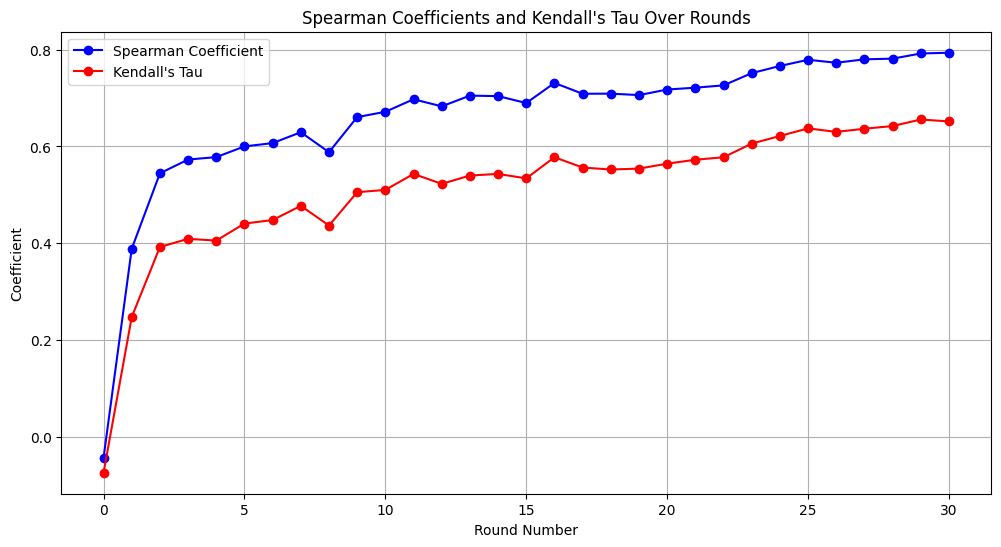

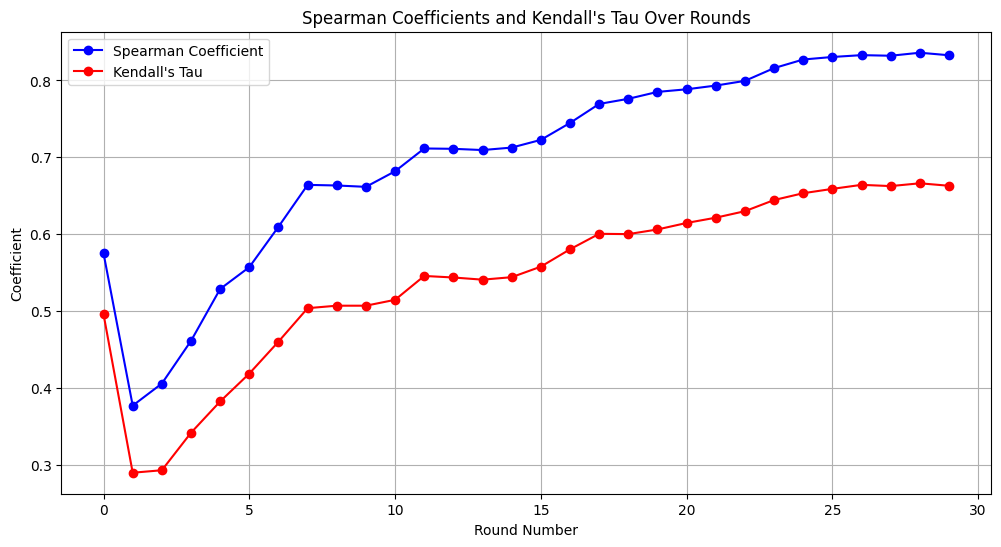

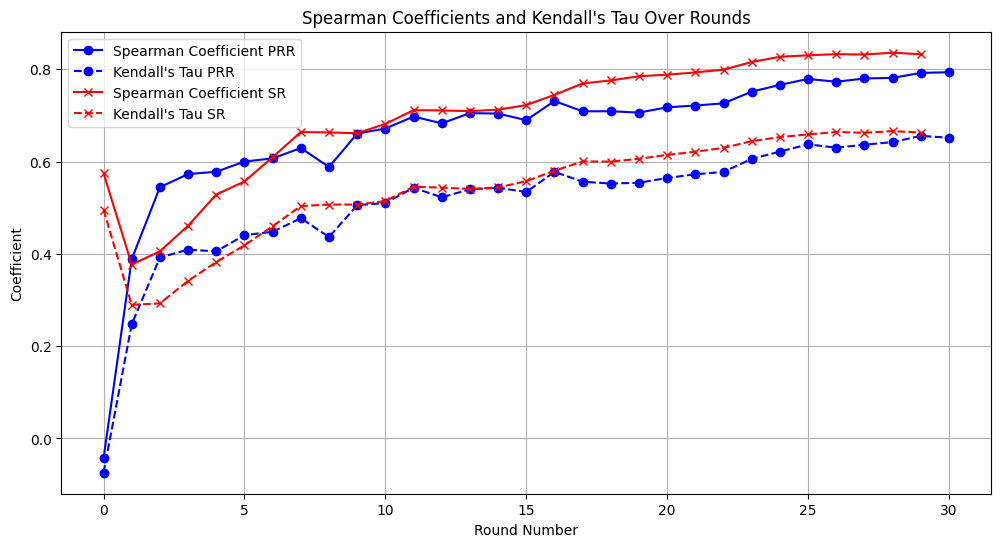

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
import random
import matplotlib.pyplot as plt
import math
def load_teams_from_txt(filename):
    teams = []
    strengths = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            teams.append(parts[0])
            strengths.append(float(parts[1]))
    return pd.DataFrame({'Team': teams, 'Strength': strengths})

def simulate_match(team_a, team_b):
    wins_a, wins_b = 0, 0
    net_win = 0

    while wins_a < 2 and wins_b < 2:
        win_prob_a = team_a['Strength'] / (team_a['Strength'] + team_b['Strength'])
        if np.random.rand() < win_prob_a:
            wins_a += 1
        else:
            wins_b += 1

    if wins_a == 2:
        net_win = 2 - wins_b
        return team_a['Team'], team_b['Team'], 1, net_win  # team_a wins
    else:
        net_win = wins_a - 2
        return team_b['Team'], team_a['Team'], 1, net_win  # team_b wins
def swiss_roun

In [ ]:
def swiss_round(teams, round_num, points, sub_scores, net_wins, match_history):
    if round_num == 1:
        shuffled_teams = teams.sample(frac=1).reset_index(drop=True)
        team_pairs = [(shuffled_teams.iloc[i], shuffled_teams.iloc[i+1]) for i in range(0, len(shuffled_teams)-1, 2)]
    else:
        teams = teams.assign(
            Points=teams['Team'].map(points),
            Sub_score=teams['Team'].map(sub_scores),
            Net_win=teams['Team'].map(net_wins)
        )
        teams_sorted = teams.sort_values(by=['Points', 'Sub_score', 'Net_win'], ascending=[False, False, False])
        available_teams = set(teams_sorted['Team'])
        team_pairs = []

        while available_teams:
            team_a = teams_sorted[teams_sorted['Team'].isin(available_teams)].iloc[0]
            available_teams.remove(team_a['Team'])

            possible_opponents = teams_sorted[
                (teams_sorted['Team'].isin(available_teams)) & 
                (~teams_sorted['Team'].isin(match_history[team_a['Team']]))
            ]

            if possible_opponents.empty:
                continue

            team_b = possible_opponents.iloc[0]
            available_teams.remove(team_b['Team'])
            team_pairs.append((team_a, team_b))

    for team_a, team_b in team_pairs:
        winner, loser, win_points, net_win = simulate_match(team_a, team_b)
        points[winner] += win_points
        sub_scores[winner] += points[loser]
        net_wins[winner] += net_win
        match_history[winner].add(loser)
        match_history[loser].add(winner)

def calculate_spearman(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return spearman_corr

def calculate_kendall(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    kendall_corr, _ = kendalltau(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return kendall_corr

def generate_round_table_groups(n):
    if n % 2 != 0:
        raise ValueError("n must be even and greater than 2")
    
    isolated_point = 1
    round_table = list(range(2, n + 1))
    groups = []
    
    for _ in range(len(round_table)):
        temp_list = round_table[:]
        group = [(isolated_point, temp_list[0])]
        temp_list.pop(0)
        
        while len(temp_list) > 1:
            group.append((temp_list[0], temp_list[-1]))
            temp_list = temp_list[1:-1]
        
        groups.append(group)
        round_table = round_table[1:] + round_table[:1]
    
    return groups

def create_schedule(teams):
    num_teams = len(teams)
    team_indices = list(range(num_teams))
    schedule = generate_round_table_groups(num_teams)
    
    for round_num, round_pairs in enumerate(schedule):
        schedule[round_num] = [(team_indices[pair[0]-1], team_indices[pair[1]-1]) for pair in round_pairs]
    
    random.shuffle(schedule)  # Shuffle rounds to randomize matchups
    return schedule

def calculate_spearman(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return spearman_corr

def calculate_kendall(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    kendall_corr, _ = kendalltau(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return kendall_corr

def simulate_PRR_matches(teams, schedule):
    points = {team: 0 for team in teams['Team']}
    spearman_scores = []
    kendall_scores = []

    for round_num, round_matches in enumerate(schedule):
        for team_a_idx, team_b_idx in round_matches:
            team_a = teams.iloc[team_a_idx]
            team_b = teams.iloc[team_b_idx]
            wins_a, wins_b = 0, 0

            # Best of 2 games
            while wins_a < 2 and wins_b < 2:
                win_prob_a = team_a['Strength'] / (team_a['Strength'] + team_b['Strength'])
                if np.random.rand() < win_prob_a:
                    wins_a += 1
                else:
                    wins_b += 1
            
            if wins_a == 2:
                points[team_a['Team']] += 1
            else:
                points[team_b['Team']] += 1

        teams['Points'] = teams['Team'].apply(lambda team: points[team])
        spearman_scores.append(calculate_spearman(teams))
        kendall_scores.append(calculate_kendall(teams))

    return spearman_scores, kendall_scores

def run_simulation_PRR(filename,iterations=10):
    teams = load_teams_from_txt(filename)


    # schedule = create_schedule(teams)
    # Simulate matches and calculate Spearman coefficients and Kendall's Tau
    avr_spearman_scores=[]
    avr_kendall_scores=[]
    schedule = create_schedule(teams)
    all_spearman_scores = np.zeros((iterations+1,len(schedule)))
    all_kendall_scores = np.zeros((iterations+1,len(schedule)))
    # spearman_scores, kendall_scores = simulate_PRR_matches(teams, schedule)
    for i in range(iterations):
        spearman_scores, kendall_scores = simulate_PRR_matches(teams, schedule)
        all_spearman_scores[i, :len(spearman_scores)] = spearman_scores
        all_kendall_scores[i, :len(kendall_scores)] = kendall_scores
    avr_spearman_scores = np.mean(all_spearman_scores, axis=0)
    avr_kendall_scores = np.mean(all_kendall_scores, axis=0)
    # Plotting Spearman coefficients and Kendall's Tau
    plt.figure(figsize=(12, 6))
    # plt.plot(spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    # plt.plot(kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    
    plt.plot(avr_spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    plt.plot(avr_kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.grid(True)
    plt.show()

    # return spearman_scores, kendall_scores
    return avr_spearman_scores,avr_kendall_scores

def run_simulation_swiss_round(teams, num_rounds=30, num_iterations=10):
    all_spearman_scores = np.zeros((num_iterations, num_rounds))
    all_kendall_scores = np.zeros((num_iterations, num_rounds))
    
    for iteration in range(num_iterations):
        points = {team: 0 for team in teams['Team']}
        sub_scores = {team: 0 for team in teams['Team']}
        net_wins = {team: 0 for team in teams['Team']}
        match_history = {team: set() for team in teams['Team']}
        
        spearman_scores = []
        kendall_scores = []

        for round_num in range(1, num_rounds + 1):
            swiss_round(teams, round_num, points, sub_scores, net_wins, match_history)
            teams['Points'] = teams['Team'].apply(lambda team: points[team])
            teams['Sub_score'] = teams['Team'].apply(lambda team: sub_scores[team])
            teams['Net_win'] = teams['Team'].apply(lambda team: net_wins[team])

            points_df = teams.sort_values(by=['Points', 'Sub_score', 'Net_win'], ascending=[False, False, False]).reset_index(drop=True)
            points_df['Ranking'] = points_df.index + 1
            
            true_ranking = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
            true_ranking['Initial_Rank'] = true_ranking.index + 1
            
            predicted_ranking = points_df[['Team', 'Ranking']]
            predicted_ranking.columns = ['Team', 'Predicted_Rank']
            
            comparison_df = pd.merge(true_ranking[['Team', 'Initial_Rank']], predicted_ranking, on='Team')
            spearman_corr, _ = spearmanr(comparison_df['Initial_Rank'], comparison_df['Predicted_Rank'])
            spearman_scores.append(spearman_corr)
            kendall_corr, _ = kendalltau(comparison_df['Initial_Rank'], comparison_df['Predicted_Rank'])
            kendall_scores.append(kendall_corr)

        all_spearman_scores[iteration, :len(spearman_scores)] = spearman_scores
        all_kendall_scores[iteration, :len(kendall_scores)] = kendall_scores

    average_spearman_scores = np.mean(all_spearman_scores, axis=0)
    average_kendall_scores = np.mean(all_kendall_scores, axis=0)

    plt.figure(figsize=(12, 6))
    plt.plot(average_spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    plt.plot(average_kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.grid(True)
    plt.show()

    return average_spearman_scores, average_kendall_scores


filename = "teams_0.5.txt"
spearman_scores_PRR, kendall_scores_PRR = run_simulation_PRR(filename)
teams = load_teams_from_txt(filename)
spearman_scores_SR, kendall_scores_SR = run_simulation_swiss_round(teams, num_rounds=30, num_iterations=10)

plt.figure(figsize=(12, 6))
plt.plot(spearman_scores_PRR, marker='o', linestyle='-', color='b', label='Spearman Coefficient PRR')
plt.plot(kendall_scores_PRR, marker='o', linestyle='--', color='b', label='Kendall\'s Tau PRR')
plt.plot(spearman_scores_SR, marker='x', linestyle='-', color='r', label='Spearman Coefficient SR')
plt.plot(kendall_scores_SR, marker='x', linestyle='--', color='r', label='Kendall\'s Tau SR')
plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
plt.xlabel('Round Number')
plt.ylabel('Coefficient')
plt.legend()
plt.grid(True)
plt.show()

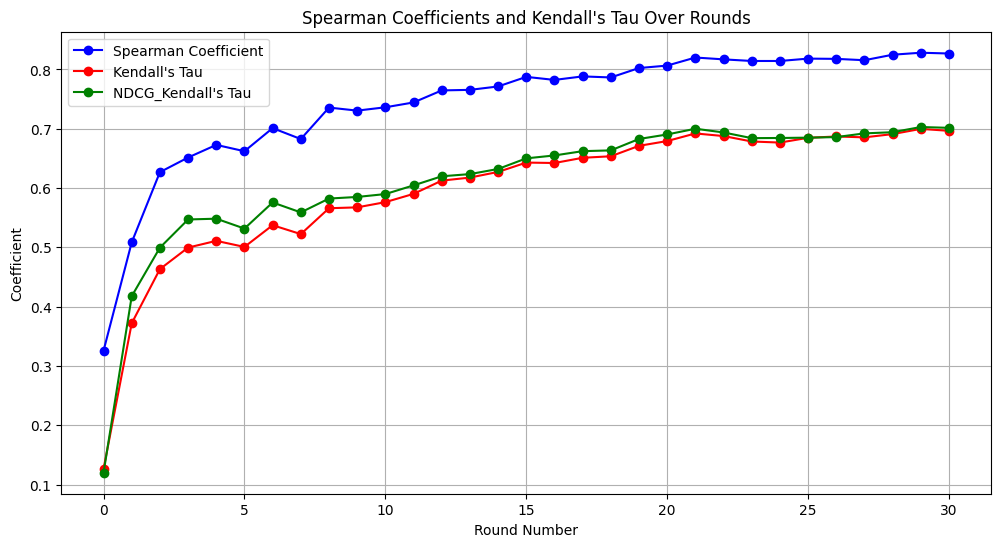

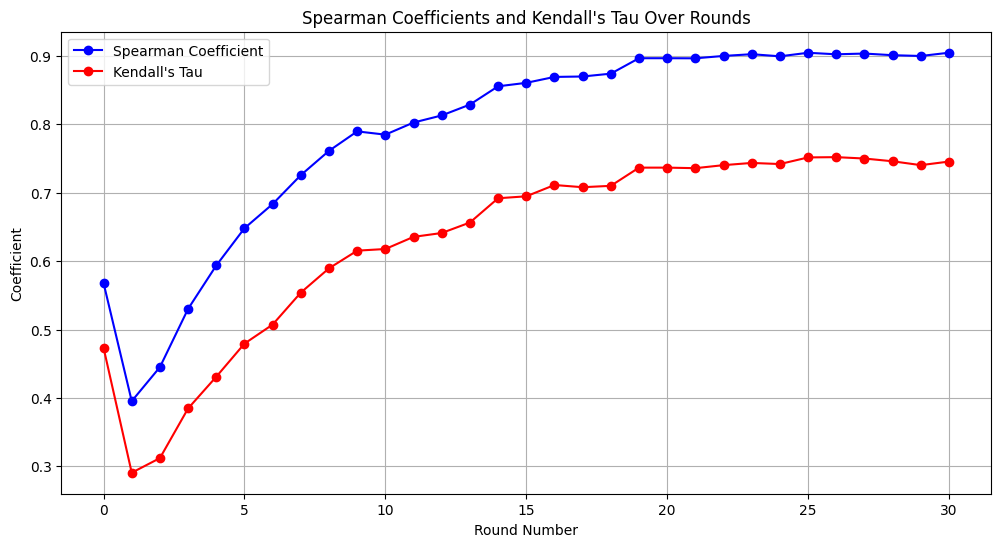

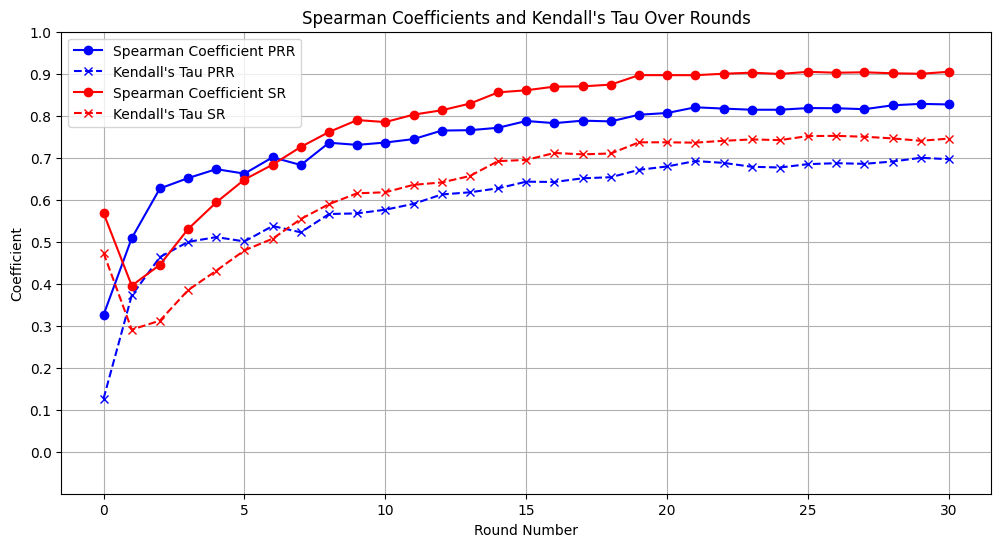

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, kendalltau
import random
import matplotlib.pyplot as plt
import math
def load_teams_from_txt(filename):
    teams = []
    strengths = []
    with open(filename, 'r') as f:
        for line in f:
            parts = line.strip().split()
            teams.append(parts[0])
            strengths.append(float(parts[1]))
    return pd.DataFrame({'Team': teams, 'Strength': strengths})

def simulate_match(team_a, team_b, Best_of_num=4):
    wins_a, wins_b = 0, 0
    net_win = 0

    while wins_a < Best_of_num and wins_b < Best_of_num:
        win_prob_a = team_a['Strength'] / (team_a['Strength'] + team_b['Strength'])
        if np.random.rand() < win_prob_a:
            wins_a += 1
        else:
            wins_b += 1

    if wins_a == Best_of_num:
        net_win = Best_of_num - wins_b
        return team_a['Team'], team_b['Team'], 1, net_win  # team_a wins
    else:
        net_win = wins_a - Best_of_num
        return team_b['Team'], team_a['Team'], 1, net_win  # team_b wins
def swiss_round(teams, round_num, points, sub_scores, net_wins, match_history):
    if round_num == 1:
        shuffled_teams = teams.sample(frac=1).reset_index(drop=True)
        team_pairs = [(shuffled_teams.iloc[i], shuffled_teams.iloc[i+1]) for i in range(0, len(shuffled_teams)-1, 2)]
    else:
        teams = teams.assign(
            Points=teams['Team'].map(points),
            Sub_score=teams['Team'].map(sub_scores),
            Net_win=teams['Team'].map(net_wins)
        )
        teams_sorted = teams.sort_values(by=['Points', 'Sub_score', 'Net_win'], ascending=[False, False, False])
        available_teams = set(teams_sorted['Team'])
        team_pairs = []

        while available_teams:
            team_a = teams_sorted[teams_sorted['Team'].isin(available_teams)].iloc[0]
            available_teams.remove(team_a['Team'])

            possible_opponents = teams_sorted[
                (teams_sorted['Team'].isin(available_teams)) & 
                (~teams_sorted['Team'].isin(match_history[team_a['Team']]))
            ]

            if possible_opponents.empty:
                continue

            team_b = possible_opponents.iloc[0]
            available_teams.remove(team_b['Team'])
            team_pairs.append((team_a, team_b))

    for team_a, team_b in team_pairs:
        winner, loser, win_points, net_win = simulate_match(team_a, team_b)
        points[winner] += win_points
        sub_scores[winner] += points[loser]
        net_wins[winner] += net_win
        match_history[winner].add(loser)
        match_history[loser].add(winner)

def calculate_spearman(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return spearman_corr

def calculate_kendall(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    kendall_corr, _ = kendalltau(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return kendall_corr

def generate_round_table_groups(n):
    if n % 2 != 0:
        raise ValueError("n must be even and greater than 2")
    
    isolated_point = 1
    round_table = list(range(2, n + 1))
    groups = []
    
    for _ in range(len(round_table)):
        temp_list = round_table[:]
        group = [(isolated_point, temp_list[0])]
        temp_list.pop(0)
        
        while len(temp_list) > 1:
            group.append((temp_list[0], temp_list[-1]))
            temp_list = temp_list[1:-1]
        
        groups.append(group)
        round_table = round_table[1:] + round_table[:1]
    
    return groups

def create_schedule(teams):
    num_teams = len(teams)
    team_indices = list(range(num_teams))
    schedule = generate_round_table_groups(num_teams)
    
    for round_num, round_pairs in enumerate(schedule):
        schedule[round_num] = [(team_indices[pair[0]-1], team_indices[pair[1]-1]) for pair in round_pairs]
    
    random.shuffle(schedule)  # Shuffle rounds to randomize matchups
    return schedule

def calculate_spearman(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return spearman_corr

def calculate_kendall(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    kendall_corr, _ = kendalltau(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return kendall_corr

def simulate_PRR_matches(teams, schedule, Best_of_num=4):
    points = {team: 0 for team in teams['Team']}
    spearman_scores = []
    kendall_scores = []
    NDCG_Kendall_scores=[]
    for round_num, round_matches in enumerate(schedule):
        for team_a_idx, team_b_idx in round_matches:
            team_a = teams.iloc[team_a_idx]
            team_b = teams.iloc[team_b_idx]
            wins_a, wins_b = 0, 0

            # Best of 2 games
            while wins_a < Best_of_num and wins_b < Best_of_num:
                win_prob_a = team_a['Strength'] / (team_a['Strength'] + team_b['Strength'])
                if np.random.rand() < win_prob_a:
                    wins_a += 1
                else:
                    wins_b += 1
            
            if wins_a == Best_of_num:
                points[team_a['Team']] += 1
            else:
                points[team_b['Team']] += 1

        teams['Points'] = teams['Team'].apply(lambda team: points[team])
        spearman_scores.append(calculate_spearman(teams))
        kendall_scores.append(calculate_kendall(teams))
        NDCG_Kendall_scores.append(calculate_NDCG_Ken(teams))
    return spearman_scores, kendall_scores, NDCG_Kendall_scores



def NDCG_Ken(ideallist, predictlist):
    kendall_tau=0
    ideal_NDCG_Ken=0
    NDCG_Ken=0
    for n in range (len(ideallist)-1):
        ideal_NDCG_Ken+=1/math.log2(1+1+n)
    for i in range (len(ideallist)-1):
        kendall_tau=0
        for j in range (i,len(ideallist)-1):
            if(((ideallist[i]>=ideallist[j+1])and(predictlist[i]>=predictlist[i+1]))or((ideallist[i]<=ideallist[j+1])and(predictlist[i]<=predictlist[j+1]))):
                kendall_tau+=1
            else:
                kendall_tau-=1
        kendall_tau=kendall_tau/(len(ideallist)-i-1)
        kendall_tau=1/math.log2(i+2)*kendall_tau
        NDCG_Ken+=kendall_tau

    NDCG_Ken=NDCG_Ken/ideal_NDCG_Ken
    return(NDCG_Ken)


def calculate_NDCG_Ken(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    # print(teams_sorted['Initial_Rank'].tolist())
    # print(teams_sorted['Predicted_Rank'].tolist())
    NDCG_Kendall_score= NDCG_Ken(teams_sorted['Initial_Rank'].tolist(), teams_sorted['Predicted_Rank'].tolist())
    return NDCG_Kendall_score





def run_simulation_PRR(filename,iterations=10):
    teams = load_teams_from_txt(filename)


    # schedule = create_schedule(teams)
    # Simulate matches and calculate Spearman coefficients and Kendall's Tau
    avr_spearman_scores=[]
    avr_kendall_scores=[]
    avr_NDCG_Kendall_scores=[]
    schedule = create_schedule(teams)
    all_spearman_scores = np.zeros((iterations+1,len(schedule)))
    all_kendall_scores = np.zeros((iterations+1,len(schedule)))
    all_NDCG_Kendall_scores=np.zeros((iterations+1,len(schedule)))
    
    # spearman_scores, kendall_scores = simulate_PRR_matches(teams, schedule)
    for i in range(iterations):
        spearman_scores, kendall_scores, NDCG_Kendall_scores = simulate_PRR_matches(teams, schedule)
        all_spearman_scores[i, :len(spearman_scores)] = spearman_scores
        all_kendall_scores[i, :len(kendall_scores)] = kendall_scores
        all_NDCG_Kendall_scores[i, :len(NDCG_Kendall_scores)]=NDCG_Kendall_scores
    avr_spearman_scores = np.mean(all_spearman_scores, axis=0)
    avr_kendall_scores = np.mean(all_kendall_scores, axis=0)
    avr_NDCG_Kendall_scores=np.mean(all_NDCG_Kendall_scores,axis=0)
    # Plotting Spearman coefficients and Kendall's Tau
    plt.figure(figsize=(12, 6))
    # plt.plot(spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    # plt.plot(kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    
    plt.plot(avr_spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    plt.plot(avr_kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    plt.plot(avr_NDCG_Kendall_scores, marker='o', linestyle='-', color='g', label='NDCG_Kendall\'s Tau')
    plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.grid(True)
    plt.show()

    # return spearman_scores, kendall_scores
    return avr_spearman_scores,avr_kendall_scores

def run_simulation_swiss_round(teams, num_rounds=31, num_iterations=10):
    all_spearman_scores = np.zeros((num_iterations, num_rounds))
    all_kendall_scores = np.zeros((num_iterations, num_rounds))
    
    for iteration in range(num_iterations):
        points = {team: 0 for team in teams['Team']}
        sub_scores = {team: 0 for team in teams['Team']}
        net_wins = {team: 0 for team in teams['Team']}
        match_history = {team: set() for team in teams['Team']}
        
        spearman_scores = []
        kendall_scores = []

        for round_num in range(1, num_rounds + 1):
            swiss_round(teams, round_num, points, sub_scores, net_wins, match_history)
            teams['Points'] = teams['Team'].apply(lambda team: points[team])
            teams['Sub_score'] = teams['Team'].apply(lambda team: sub_scores[team])
            teams['Net_win'] = teams['Team'].apply(lambda team: net_wins[team])

            points_df = teams.sort_values(by=['Points', 'Sub_score', 'Net_win'], ascending=[False, False, False]).reset_index(drop=True)
            points_df['Ranking'] = points_df.index + 1
            
            true_ranking = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
            true_ranking['Initial_Rank'] = true_ranking.index + 1
            
            predicted_ranking = points_df[['Team', 'Ranking']]
            predicted_ranking.columns = ['Team', 'Predicted_Rank']
            
            comparison_df = pd.merge(true_ranking[['Team', 'Initial_Rank']], predicted_ranking, on='Team')
            spearman_corr, _ = spearmanr(comparison_df['Initial_Rank'], comparison_df['Predicted_Rank'])
            spearman_scores.append(spearman_corr)
            kendall_corr, _ = kendalltau(comparison_df['Initial_Rank'], comparison_df['Predicted_Rank'])
            kendall_scores.append(kendall_corr)
            
        all_spearman_scores[iteration, :len(spearman_scores)] = spearman_scores
        all_kendall_scores[iteration, :len(kendall_scores)] = kendall_scores
        

    average_spearman_scores = np.mean(all_spearman_scores, axis=0)
    average_kendall_scores = np.mean(all_kendall_scores, axis=0)

    plt.figure(figsize=(12, 6))
    plt.plot(average_spearman_scores, marker='o', linestyle='-', color='b', label='Spearman Coefficient')
    plt.plot(average_kendall_scores, marker='o', linestyle='-', color='r', label='Kendall\'s Tau')
    plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Coefficient')
    plt.legend()
    plt.grid(True)
    plt.show()

    return average_spearman_scores, average_kendall_scores


filename = "teams_0.5.txt"
spearman_scores_PRR, kendall_scores_PRR = run_simulation_PRR(filename)
teams = load_teams_from_txt(filename)
spearman_scores_SR, kendall_scores_SR = run_simulation_swiss_round(teams, num_rounds=31, num_iterations=10)

plt.figure(figsize=(12, 6))
plt.plot(spearman_scores_PRR, marker='o', linestyle='-', color='b', label='Spearman Coefficient PRR')
plt.plot(kendall_scores_PRR, marker='x', linestyle='--', color='b', label='Kendall\'s Tau PRR')
plt.plot(spearman_scores_SR, marker='o', linestyle='-', color='r', label='Spearman Coefficient SR')
plt.plot(kendall_scores_SR, marker='x', linestyle='--', color='r', label='Kendall\'s Tau SR')

plt.title('Spearman Coefficients and Kendall\'s Tau Over Rounds')
plt.xlabel('Round Number')
plt.ylabel('Coefficient')
plt.ylim(-0.1, 1)
plt.yticks([i * 0.1 for i in range(11)])
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [25]:
import math
ideallist   =   [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
# predictlist =   [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
predictlist =   [9, 10, 8, 7, 6, 5, 4, 3, 2, 1]
predictlist =   [10, 9, 8, 6, 5, 4, 3, 2, 1, 7]
predictlist =   [10, 8, 9, 7, 6, 5, 4, 3, 2, 1]
kendall_tau=0
ideal_NDCG_Ken=0
NDCG_Ken=0
for n in range (len(ideallist)-1):
    ideal_NDCG_Ken+=1/math.log2(1+1+n)
for i in range (len(ideallist)-1):
    kendall_tau=0
    for j in range (i,len(ideallist)-1):
        if(((ideallist[i]>=ideallist[j+1])and(predictlist[i]>=predictlist[i+1]))or((ideallist[i]<=ideallist[j+1])and(predictlist[i]<=predictlist[j+1]))):
            kendall_tau+=1
    kendall_tau=kendall_tau/(len(ideallist)-i-1)
    kendall_tau=1/math.log2(i+2)*kendall_tau
    NDCG_Ken+=kendall_tau

NDCG_Ken=NDCG_Ken/ideal_NDCG_Ken
print(NDCG_Ken)

0.8517027694298509


In [ ]:
def NDCG_Ken(ideallist, predictlist):
    kendall_tau=0
    ideal_NDCG_Ken=0
    NDCG_Ken=0
    for n in range (len(ideallist)-1):
        ideal_NDCG_Ken+=1/math.log2(1+1+n)
    for i in range (len(ideallist)-1):
        kendall_tau=0
        for j in range (i,len(ideallist)-1):
            if(((ideallist[i]>=ideallist[j+1])and(predictlist[i]>=predictlist[i+1]))or((ideallist[i]<=ideallist[j+1])and(predictlist[i]<=predictlist[j+1]))):
                kendall_tau+=1
        kendall_tau=kendall_tau/(len(ideallist)-i-1)
        kendall_tau=1/math.log2(i+2)*kendall_tau
        NDCG_Ken+=kendall_tau

    NDCG_Ken=NDCG_Ken/ideal_NDCG_Ken
    return(NDCG_Ken)


def calculate_NDCG_Ken(team):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    NDCG_Kendall_score= NDCG_Ken(teams_sorted['Initial_Rank'].tolist(), teams_sorted['Predicted_Rank'].tolist())
    return NDCG_Kendall_score

In [ ]:
def calculate_spearman(teams):
    teams_sorted = teams.sort_values(by='Strength', ascending=False).reset_index(drop=True)
    teams_sorted['Initial_Rank'] = teams_sorted.index + 1
    teams_sorted = teams_sorted.sort_values(by='Points', ascending=False).reset_index(drop=True)
    teams_sorted['Predicted_Rank'] = teams_sorted.index + 1
    spearman_corr, _ = spearmanr(teams_sorted['Initial_Rank'], teams_sorted['Predicted_Rank'])
    return spearman_corr